In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import numpy as np
import dill as pickle

In [169]:
model = pd.read_csv('Downloads/model.csv',index_col=0).rename(columns={'number':'weekly_rent'})

In [411]:
model = model[~model['weekly_rent'].isna()]
model = model[(model['weekly_rent']<1500) & (model['weekly_rent']>200)]

In [412]:
y = model['weekly_rent']
X = model[['classs','postcode', 'bedrooms', 'bathrooms','parkings','distance_m']]
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2,random_state=0)

In [413]:
def all_categorical(X):
    return X[:, :2]
def all_numeric(X):
    return X[:, 2:]
cat_pipeline = Pipeline(
    steps=[
        ("select", FunctionTransformer(all_categorical)),
        ("tfidf", OneHotEncoder(handle_unknown='ignore')),
        ]
)
num_pipeline = Pipeline(
    steps=[
        ("select", FunctionTransformer(all_numeric)),
        ("imputer", SimpleImputer(missing_values=np.nan, strategy='median')),
        ("tfidf", StandardScaler()),
    ]
)
combined_features = FeatureUnion([ ("cat", cat_pipeline),("num", num_pipeline)])

In [414]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

X_trainp = combined_features.fit_transform(X_train)
#model1 = RandomForestRegressor(random_state=0)
model1.fit(X_trainp,y_train)
y_trainp = model1.predict(X_trainp)
X_testp = combined_features.transform(X_test)
y_testp = model1.predict(X_testp)

Score = 94.18%.
Train Score : 0.9417669706898879


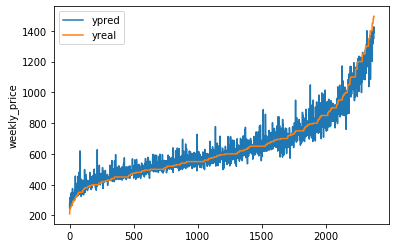

In [429]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Score = {:0.2f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestRegressor(random_state=0,n_estimators=300, min_samples_split =2,min_samples_leaf=1,max_depth=22)
base_model.fit(X_trainp, y_train)

df3 = pd.DataFrame()
df3['ypred'] = y_trainp
df3['yreal'] = y_train
df3 = df3.sort_values(by='yreal')
df3.reset_index(inplace=True,drop=True)
print('Train Score : '+str(evaluate(base_model,X_trainp,y_train)/100))
df3.plot(ylabel='weekly_price');

Score = 85.08%.
Test Score : 0.8507742838060278


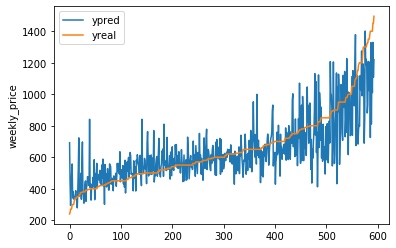

In [430]:
df3 = pd.DataFrame()
df3['ypred'] = y_testp
df3['yreal'] = y_test
df3 = df3.sort_values(by='yreal')
df3.reset_index(inplace=True,drop=True)
print('Test Score : '+str(evaluate(base_model,X_testp,y_test)/100))
df3.plot(ylabel='weekly_price');

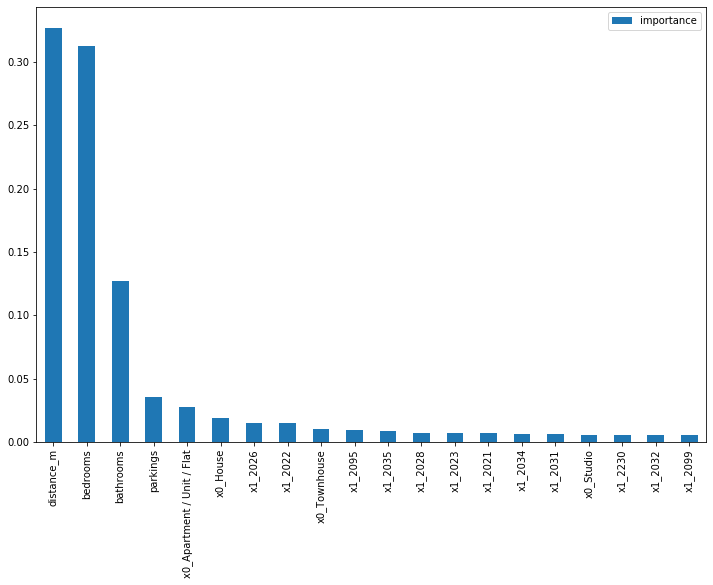

In [417]:
vect1 = OneHotEncoder(handle_unknown='ignore')
Xa = vect1.fit_transform(X_train[:, :2])
fet_cat = vect1.get_feature_names()
fet_cat = fet_cat.tolist()
fet_num = ['bedrooms', 'bathrooms','parkings','distance_m']
fet = fet_cat + fet_num
feature_importances = pd.DataFrame(base_model.feature_importances_,
                                   index = fet,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.iloc[:20].plot(kind='bar',figsize=(12,8));